In [1]:
from COSIpy import *

Welcome to JupyROOT 6.22/02


/usr/local/Cellar/python/3.7.7/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


<h3>Defining a grid in the sky with FISBEL:<br>
    You define the number of pixels with the ~same size (i.e. you look up the size of the pixels afterwards; it might also work the other way round but the important numbers here are:<br>
    n = 1650 for a 5 deg grid<br>
    n = 4853 for a 3 deg grid)<br>
    For example, to illustrate, I use 20 pixels:</h3>

In [2]:
N = 20
fb = FISBEL(n_bins=N)

<h3>For plotting, I use random values. For you problem, you will have the number of pointings inside each pixel:</h3>

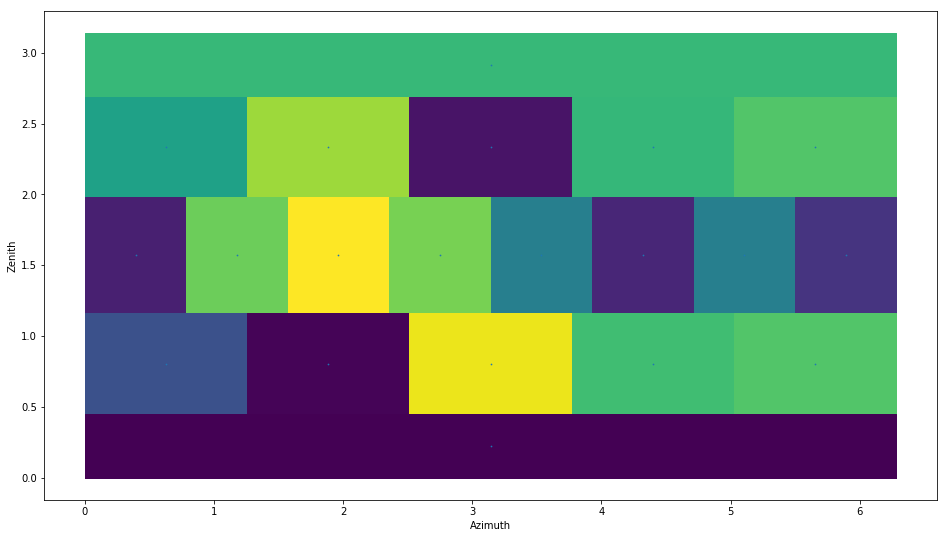

In [3]:
fb.plot_FISBEL_tessellation(tiles=True,values=np.random.rand(N))

<h3>These 20 pixels (tiles) have the same solid angle. This is why the top and bottom pixel appear strechted. The central dot is just plotted for illustration.<br>
    We can access the different edges in longitude and latitude by attributed of the fb object:<br>
fb.lat_cen<br>
fb.lat_edges<br>
fb.lat_min<br>
fb.lat_max<br>
fb.lat_wid<br>
    And the same for longitude.
</h3>

In [4]:
fb.available_attributes

fisbelbins
n_fisbel_bins
lat_cen
lon_cen
lat_wid
lon_wid
lat_min
lon_min
lat_max
lon_max
lat_edges
lon_edges


In [5]:
fb.lat_min

array([0.      , 0.451027, 0.451027, 0.451027, 0.451027, 0.451027,
       1.159279, 1.159279, 1.159279, 1.159279, 1.159279, 1.159279,
       1.159279, 1.159279, 1.982313, 1.982313, 1.982313, 1.982313,
       1.982313, 2.690566])

<h3>The definition is given in units of rad, so that latitude goes from $0$ to $\pi$ and longitude from $0$ to $2\pi$. For the correct problem, you might want to adapt the definition to degrees and -90 to +90 or something.</h3>

<h3>I thought i had the size of the pixels as well, somewhere, but you can also just calculate them:</h3>

In [6]:
domega = ((np.cos(fb.lat_min)-np.cos(fb.lat_max))*fb.lon_wid)

In [7]:
domega

array([0.62831905, 0.62831787, 0.62831787, 0.62831787, 0.62831787,
       0.62831787, 0.62831875, 0.62831875, 0.62831875, 0.62831875,
       0.62831875, 0.62831875, 0.62831875, 0.62831875, 0.62831882,
       0.62831882, 0.62831882, 0.62831882, 0.62831882, 0.6283181 ])

<h3>You see the pixel size is always the ~same (not exactly though), given in $\rm rad^2$. To get the square-degree size, you just multiply by $(180/\pi)^2$. And for the square-pixel equivalent, just taking the square-root:</h3>

In [8]:
np.sum(domega),4*np.pi

(12.566370614358798, 12.566370614359172)

In [9]:
domega*(180/np.pi)**2

array([2062.64975459, 2062.64590647, 2062.64590647, 2062.64590647,
       2062.64590647, 2062.64590647, 2062.64878997, 2062.64878997,
       2062.64878997, 2062.64878997, 2062.64878997, 2062.64878997,
       2062.64878997, 2062.64878997, 2062.64900053, 2062.64900053,
       2062.64900053, 2062.64900053, 2062.64900053, 2062.64664006])

In [10]:
np.sqrt(domega*(180/np.pi)**2)

array([45.41640403, 45.41636166, 45.41636166, 45.41636166, 45.41636166,
       45.41636166, 45.41639341, 45.41639341, 45.41639341, 45.41639341,
       45.41639341, 45.41639341, 45.41639341, 45.41639341, 45.41639572,
       45.41639572, 45.41639572, 45.41639572, 45.41639572, 45.41636974])

In [11]:
np.sum(domega*(180/np.pi)**2),360**2/np.pi

(41252.96124941804, 41252.96124941927)

<h3>Yes, the sky consists of 41253 square-degrees.</h3>